<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning_2024_2/blob/main/%08SVM02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import library


In [3]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os

# ensorFlow의 로그 출력을 줄이기 위해 사용되는 코드
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [11]:
#sklearn에서 제공하는 iris호출
iris=datasets.load_iris()

#sklearn에서 제공하는 model_selection 패키지에서 제공하는 train_test_split() 메서드를 활용
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3, random_state=42)


# train_test_split으로 훈련 데이터와 테스터 데이터를 나눈 것을 확인하기 위해 shape을 해본다.
#X_train.shape #(105, 4)
#X_test.shape #(45, 4)
#y_train.shape #(105,)
y_test.shape #(45,)

(45,)

In [14]:
#SVM model accuracy
#svm=svm.SVC(kernel='linear',C=1.0,gamma=0.5)
#svm.fit(X_train,y_train)

model=svm.SVC(kernel='linear',C=10.0)       #kernel='linear':선형 커널을 사용하여 데이터를 분류, 3D='RBF'
                                            #c=1.0:오류에 대한 패널티를 조절하는 하이퍼파리미터(값이 크면 오분
                                            #gamma=0.5 : RBF 커널(Radial Basis Function : 방사 기저 함수 : 비선형




model.fit(X_train,y_train) #훈련 데이터를 사용하여 svm 분류기를 훈련

predictions=model.predict(X_test) #훈련된 모델을 사용하여 테스트 데이터에서 예측
score=metrics.accuracy_score(y_test,predictions)
print("정확도:{0:0.3f}".format(score))

정확도:0.978


In [15]:
# 결과값이 0,1,2로 나오는 것은 붓꽃 데이터 세 종류를 각각 0,1,2라 했을 때
# y_test의 값과 x_test로 예측한 predictions가 얼마나 같은지 눈으로 볼 수 있다.
print(y_test)
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [16]:
print(metrics.classification_report(y_test,predictions))
#accuracy : 정확도 : TP+TN/TP+TN+FP+FN
#precision : 정밀도(예측한 것을 실제로 맞춘 비율) TP / TP+FP
#recall : 재현율 (실제를 예측해서 맞춘 비율) TP / TP+FN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



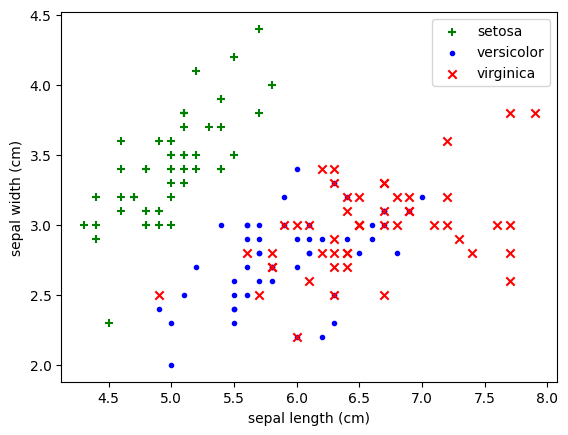

In [23]:
# Iris 데이터셋 불러오기
iris = datasets.load_iris()

# DataFrame 생성
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# target feature 추가
df['target'] = iris.target

# target 값을 flower 이름으로 변환
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

# target 값별로 DataFrame 분리
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

# 산점도 그리기
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+', label='setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.', label='versicolor')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='x', label='virginica')

# 축 레이블 설정
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()


Text(0, 0.5, 'petal width (cm)')

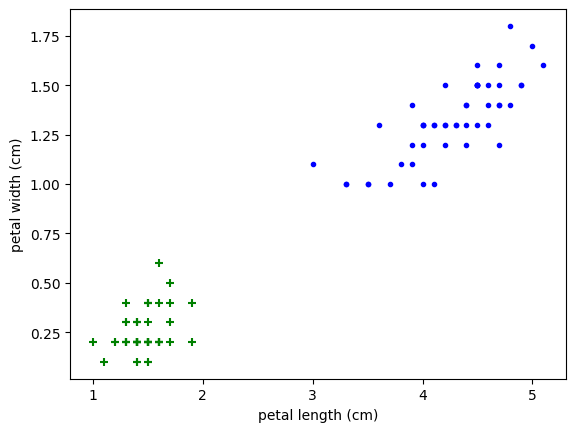

In [24]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+', label='setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.', label='versicolor')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [25]:
X=df.drop(['target','flower_name'],axis='columns')
y=df.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=SVC()
#C값이 클수록 하드마진(오류 허용 안 함),작을수록 소프트마진(오류를 허용함)이다
#shift tab으로 svc확인!(여러 파라미터들이 있다.)
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.9666666666666667